# Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import investpy  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Importation et visualisation de la base de données 

In [3]:
stocks = ['AB','ATB','BH','BIAT','BNA','BS','BT','STB','UBCI','UIB','BTEI']
dfs = pd.DataFrame()
for stock in stocks:
    df = investpy.get_stock_historical_data(stock=stock, country="Tunisia", from_date="31/12/2010", to_date="31/12/2020")["Close"]    
    dfs = dfs.append(df)
dfs = dfs.T
dfs.columns=stocks

In [4]:
dfs

,AB,ATB,BH,BIAT,BNA,BS,BT,STB,UBCI,UIB,BTEI
2010-12-31,38.73,7.98,29.46,73.00,15.00,21.78,11.62,18.99,40.80,20.80,29.20
2011-01-04,39.88,7.98,30.00,74.44,15.14,21.51,12.08,18.80,40.76,20.40,29.50
2011-01-05,40.24,7.95,30.00,75.00,15.44,22.06,12.08,18.80,40.70,20.40,29.90
2011-01-06,40.00,7.82,29.80,73.80,15.35,21.68,12.09,19.00,41.00,20.40,NaN
2011-01-07,38.80,7.80,29.70,76.80,15.38,21.70,12.07,19.00,40.90,20.30,30.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,NaN,3.02,8.70,47.00,8.59,25.22,6.80,3.40,21.10,15.50,8.46
2017-11-03,NaN,NaN,20.00,NaN,10.25,34.83,6.24,3.95,23.00,22.40,14.50
2020-03-16,NaN,NaN,9.32,49.05,10.09,25.80,7.34,NaN,NaN,18.86,NaN
2012-01-06,NaN,NaN,NaN,75.00,12.00,NaN,NaN,NaN,NaN,18.45,29.72


In [5]:
dfs.isnull().sum()

AB        28
ATB      132
BH       246
BIAT      43
BNA       86
BS         7
BT        20
STB      114
UBCI    1219
UIB       25
BTEI     862
dtype: int64

In [9]:
mean_values=dfs[['AB','ATB','BH','BIAT','BNA','BS','BT','STB','UBCI','UIB','BTEI']].fillna(method='ffill')
dfs[['AB','ATB','BH','BIAT','BNA','BS','BT','STB','UBCI','UIB','BTEI']] = dfs[['AB','ATB','BH','BIAT','BNA','BS','BT','STB','UBCI','UIB','BTEI']].fillna(dfs[['AB','ATB','BH','BIAT','BNA','BS','BT','STB','UBCI','UIB','BTEI']].fillna(method='ffill'))

In [10]:
dfs.isnull().sum()

AB      0
ATB     0
BH      0
BIAT    0
BNA     0
BS      0
BT      0
STB     0
UBCI    0
UIB     0
BTEI    0
dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dfs1=sc.fit_transform(dfs)

In [12]:
print(dfs1)

[[0.93095565 0.99616858 0.97678418 ... 0.5475125  0.41529836 0.90078871]
 [0.98353909 0.99616858 1.         ... 0.54645959 0.39927913 0.91324201]
 [1.         0.99042146 1.         ... 0.54488023 0.39927913 0.92984641]
 ...
 [0.40959129 0.34668468 0.11092003 ... 0.27588494 0.33760513 0.53083387]
 [0.40959129 0.34668468 0.32423462 ... 0.27588494 0.32118542 0.92237443]
 [0.40959129 0.34668468 0.32423462 ... 0.27588494 0.32348086 0.53083387]]


In [13]:
dfs1=pd.DataFrame(dfs1)
dfs1.columns=stocks


In [14]:
print(dfs1)

            AB       ATB        BH      BIAT       BNA        BS        BT  \
0     0.930956  0.996169  0.976784  0.209726  0.588040  0.175726  0.920608   
1     0.983539  0.996169  1.000000  0.220669  0.597342  0.169025  0.998311   
2     1.000000  0.990421  1.000000  0.224924  0.617276  0.182676  0.998311   
3     0.989026  0.965517  0.991402  0.215805  0.611296  0.173244  1.000000   
4     0.934156  0.961686  0.987102  0.238602  0.613289  0.173740  0.996622   
...        ...       ...       ...       ...       ...       ...       ...   
2480  0.409591  0.045977  0.084265  0.012158  0.162126  0.261107  0.106419   
2481  0.409591  0.346685  0.570077  0.264977  0.272425  0.499628  0.011824   
2482  0.409591  0.346685  0.110920  0.027736  0.261794  0.275503  0.197635   
2483  0.409591  0.346685  0.324235  0.224924  0.388704  0.292744  0.351713   
2484  0.409591  0.346685  0.324235  0.133739  0.188704  0.076446  0.351713   

           STB      UBCI       UIB      BTEI  
0     0.999363  

<AxesSubplot:>

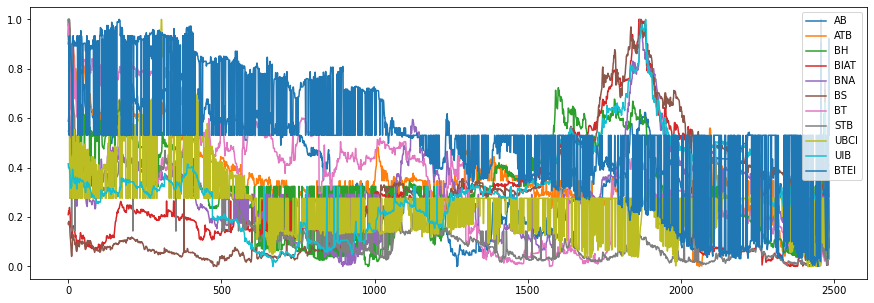

In [15]:
dfs1.plot(figsize=(15,5))

In [16]:
dfs1.corr()

,AB,ATB,BH,BIAT,BNA,BS,BT,STB,UBCI,UIB,BTEI
AB,1.000000,0.529574,0.268813,-0.169979,0.296009,-0.362299,0.667037,0.703532,0.541630,0.031431,0.475666
ATB,0.529574,1.000000,0.512207,-0.116035,0.109023,-0.463598,0.638879,0.833921,0.603749,-0.072367,0.589649
BH,0.268813,0.512207,1.000000,0.509069,0.390245,0.241407,0.143592,0.446625,0.345547,0.546588,0.158989
BIAT,-0.169979,-0.116035,0.509069,1.000000,0.478009,0.730570,-0.219076,-0.201939,-0.136987,0.683261,-0.202440
BNA,0.296009,0.109023,0.390245,0.478009,1.000000,0.540113,0.219210,0.212920,0.145939,0.706408,-0.146408
BS,-0.362299,-0.463598,0.241407,0.730570,0.540113,1.000000,-0.510950,-0.532489,-0.342366,0.835149,-0.623379
BT,0.667037,0.638879,0.143592,-0.219076,0.219210,-0.510950,1.000000,0.737323,0.395098,-0.243538,0.624043
STB,0.703532,0.833921,0.446625,-0.201939,0.212920,-0.532489,0.737323,1.000000,0.663159,-0.104375,0.620416
UBCI,0.541630,0.603749,0.345547,-0.136987,0.145939,-0.342366,0.395098,0.663159,1.000000,0.042052,0.400644
UIB,0.031431,-0.072367,0.546588,0.683261,0.706408,0.835149,-0.243538,-0.104375,0.042052,1.000000,-0.400895


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

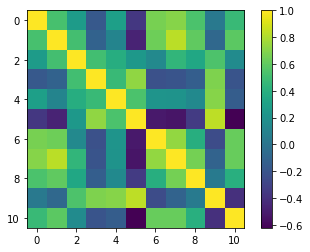

In [17]:
plt.imshow(dfs1.corr());
plt.colorbar();
plt.xlabel()
plt.ylabel("test")
plt.title("titre")

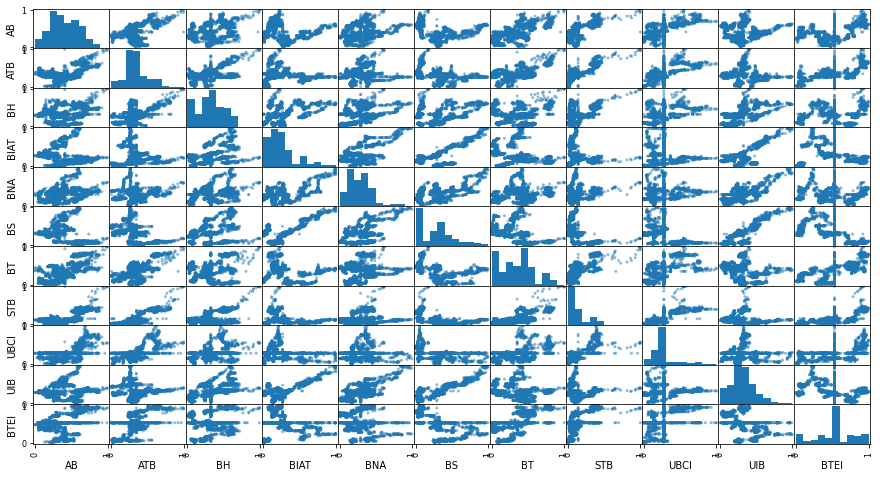

In [18]:
pd.plotting.scatter_matrix(dfs1,figsize=(15,8));

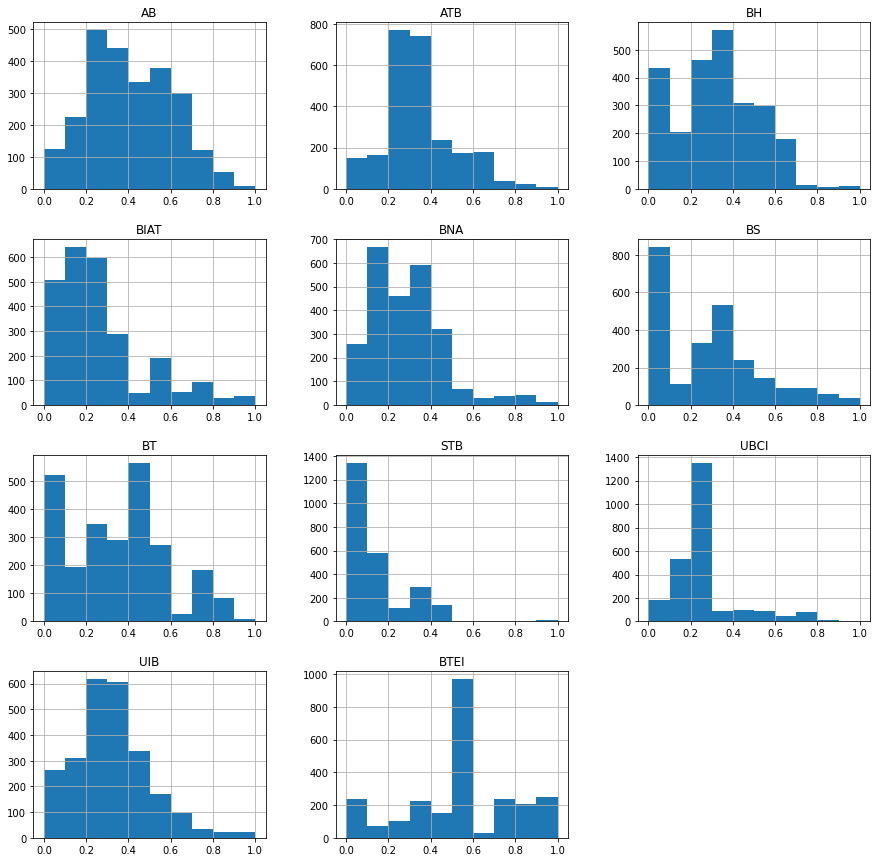

In [19]:
dfs1.hist(figsize=(15,15));

# Calcule et visualisation  des indicateurs de performance:
### - rendement annuel ##
### - volatilité annuel ##

In [20]:
#rendement annuel
dfs.pct_change().mean() * 252

AB     -0.015466
ATB     0.281620
BH      3.266470
BIAT    0.265337
BNA     0.597622
BS      0.100122
BT      0.042801
STB     1.080152
UBCI    2.523563
UIB     0.157409
BTEI    9.162969
dtype: float64

In [21]:
#volatilité annuel
dfs.pct_change().std() * np.sqrt(252)

AB      0.202012
ATB     0.926295
BH      2.817685
BIAT    0.740603
BNA     1.183604
BS      0.505946
BT      0.411470
STB     2.048527
UBCI    2.317589
UIB     0.597411
BTEI    4.783939
dtype: float64

In [22]:
performance=pd.DataFrame()
col=['rendement_annuel','volatilité_annuel']
for entreprises in dfs.keys():
    rendement_annuel = dfs[entreprises].pct_change().mean() * 252
   
    
    volatilité_annuel = dfs[entreprises].pct_change().std() * np.sqrt(252)
  
    
    performance[entreprises]=[rendement_annuel,volatilité_annuel]
performance=performance.T
performance.columns=col


In [23]:
performance

,rendement_annuel,volatilité_annuel
AB,-0.015466,0.202012
ATB,0.281620,0.926295
BH,3.266470,2.817685
BIAT,0.265337,0.740603
BNA,0.597622,1.183604
BS,0.100122,0.505946
BT,0.042801,0.411470
STB,1.080152,2.048527
UBCI,2.523563,2.317589
UIB,0.157409,0.597411


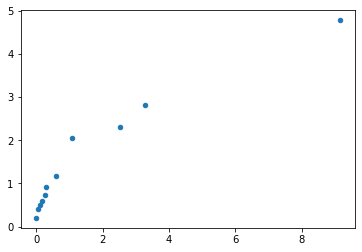

In [24]:
plt.scatter(performance.iloc[:,0],performance.iloc[:,1],s=20)


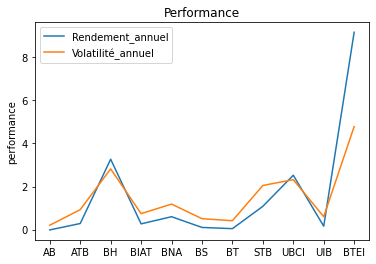

In [25]:
plt.plot(performance['rendement_annuel'],label='Rendement_annuel')
plt.plot(performance['volatilité_annuel'],label='Volatilité_annuel')
plt.legend();
plt.title("Performance");
plt.ylabel('performance');



# Algorithme KMeans :
- Method Blow
- KMeans


In [26]:
L=[]
for i in range(2,12):
    model= KMeans(n_clusters = i )
    a=model.fit(performance.iloc[:,0].values.reshape(-1,1),performance.iloc[:,1].values.reshape(-1,1))
    L.append(model.inertia_)

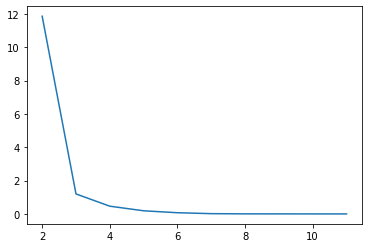

In [27]:
plt.plot(list(range(2,12)),L);

In [28]:
model=KMeans(n_clusters=3,init='random',n_init=11,max_iter=50,random_state=0)
model

KMeans(init='random', max_iter=50, n_clusters=3, n_init=11, random_state=0)

In [29]:
model.fit(performance)

KMeans(init='random', max_iter=50, n_clusters=3, n_init=11, random_state=0)

In [30]:
y_km=model.predict(performance)
y_km

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0])

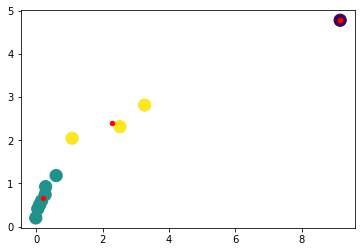

In [31]:
plt.scatter ( performance.iloc[:, 0 ],  performance.iloc[:, 1 ],  c = model.labels_,  s = 150 ,  cmap = 'viridis' )
centres  =  model. cluster_centers_
plt . scatter ( centres [:, 0 ],  centres [:, 1 ],c='red',  s = 20 );

In [32]:
performance.assign(classe=y_km)

,rendement_annuel,volatilité_annuel,classe
AB,-0.015466,0.202012,1
ATB,0.281620,0.926295,1
BH,3.266470,2.817685,2
BIAT,0.265337,0.740603,1
BNA,0.597622,1.183604,1
BS,0.100122,0.505946,1
BT,0.042801,0.411470,1
STB,1.080152,2.048527,2
UBCI,2.523563,2.317589,2
UIB,0.157409,0.597411,1


# Méthode CAH


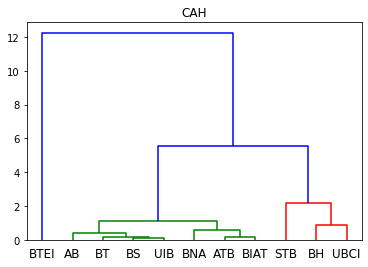

In [33]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(performance,method='ward',metric='euclidean')

plt.title("CAH")
dendrogram(Z,labels=performance.index,orientation='top',color_threshold=3)
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster

cluster = fcluster(Z,t=3,criterion='distance')

import numpy as np
idg = np.argsort(cluster)
idg
#Affichage des observations et leurs groupes
print(pd.DataFrame(performance.index[idg],cluster[idg]))

      0
1    AB
1   ATB
1  BIAT
1   BNA
1    BS
1    BT
1   UIB
2    BH
2   STB
2  UBCI
3  BTEI


In [35]:
print(cluster)

[1 1 2 1 1 1 1 2 2 1 3]


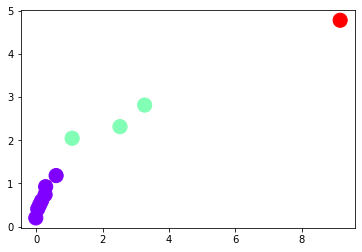

In [36]:
plt.scatter(performance.iloc[:,0],performance.iloc[:,1], c=cluster,s=200, cmap='rainbow')

In [37]:
CAH=performance.assign(classe=cluster)
CAH

,rendement_annuel,volatilité_annuel,classe
AB,-0.015466,0.202012,1
ATB,0.281620,0.926295,1
BH,3.266470,2.817685,2
BIAT,0.265337,0.740603,1
BNA,0.597622,1.183604,1
BS,0.100122,0.505946,1
BT,0.042801,0.411470,1
STB,1.080152,2.048527,2
UBCI,2.523563,2.317589,2
UIB,0.157409,0.597411,1


In [38]:
x = pd.crosstab(cluster,y_km)

In [39]:
x

col_0,0,1,2
row_0,,,
1,0,7,0
2,0,0,3
3,1,0,0
